In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import seaborn as sns
import plotly.express as px

# Hypothesese & EDA

# 1,Mean cost for each point ranges in laptop

bài toán: người dùng muốn biết X tiền và cần mua laptop với mục đích Y, thì họ sẽ chọn máy như thế nào là hợp lí nhất.

1, Với X tiền, và mục tiêu Y, thì họ sẽ nhận hiệu năng tầm bao nhiêu(cụ thể là score), và nếu muốn nâng hiệu năng lên thì họ sẽ mất thêm bao nhiêu nữa.

2, Với các khoảng giá, với các mục tiêu cụ thể thì hãng nào có score trung bình là tốt nhất.

3,

5, Với X tiền, và mục tiêu Y, hiệu năng Z, thì hãng nào có số lượng sản phẩm lớn nhất ở phân khúc đó, từ đó, giúp người dùng có tập trung vào những hãng mà có thị trường ngách tập trung tệp khách hàng đó.



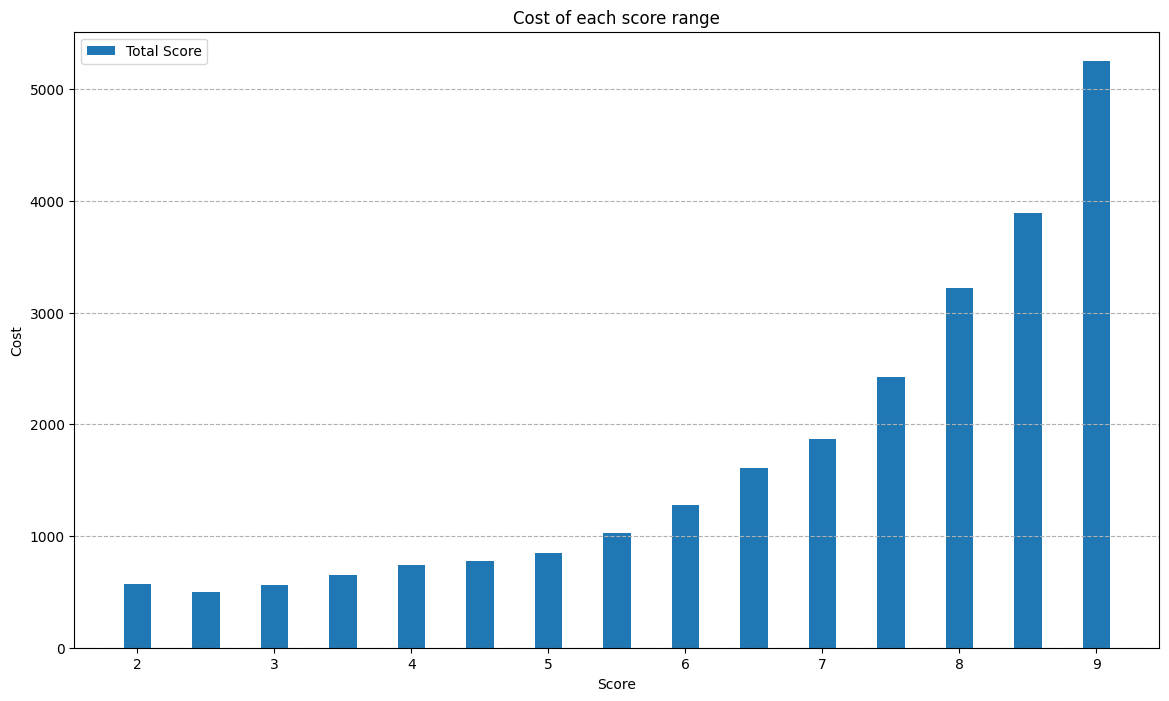

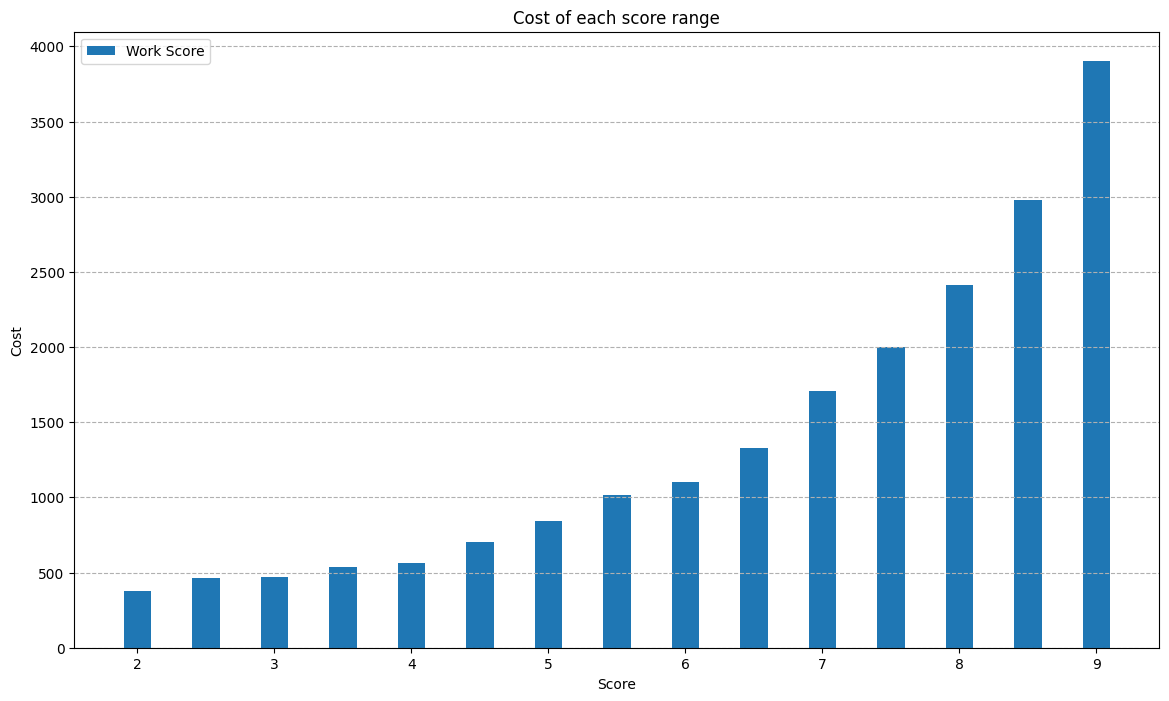

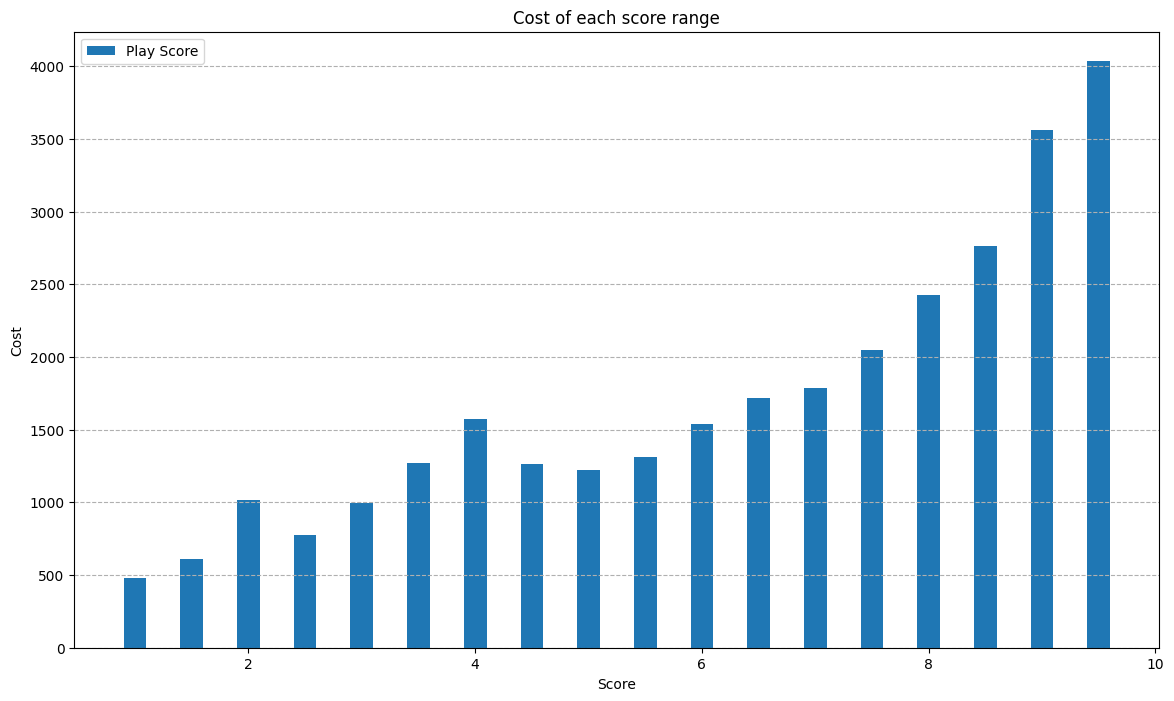

In [23]:
# Example DataFrame
df = pd.read_csv("data/laptop_final.csv")
df = df[~df["Cost"].isna()]
df = df[~df["Total Score"].isna()]
df = df[df["Cost"]<=10000]

def calculate_cost_by_bins(df, score_column, bin_width=0.5, range_min=0, range_max=10):
    # Step 1: Create bins
    bins = np.arange(range_min, range_max + bin_width, bin_width)
    df[f"{score_column} Bin"] = pd.cut(df[score_column], bins=bins, right=False)
    
    # Step 2: Group by bins and calculate mean price
    grouped = df.groupby(f"{score_column} Bin")["Cost"].mean().reset_index()
    grouped["Bin Midpoint"] = grouped[f"{score_column} Bin"].apply(lambda x: x.left) 
    # Step 3: Calculate cost to increase
    grouped["Cost to Increase"] = grouped["Cost"].diff()
    
    return grouped.dropna()  # Drop rows with NaN (first row doesn't have a previous bin)

# Plot results for all score types
score_types = ["Total Score", "Work Score", "Play Score"]
bar_width = 0.2  # Width of each bar

x = np.arange(0, 11, 0.5)[:-1]  # x-axis positions for bins (up to range_max)
# Step 4: Plot bar plots for each score type
for i, score_column in enumerate(score_types):
    cost_data = calculate_cost_by_bins(df, score_column)
    plt.figure(figsize=(14, 8))
    plt.bar(cost_data["Bin Midpoint"].to_numpy(), 
            cost_data["Cost"], 
            width=bar_width, 
            label=score_column)
    plt.title("Cost of each score range")
    plt.xlabel("Score")
    plt.ylabel("Cost")
    plt.legend()
    plt.grid(axis="y", linestyle="--")
    plt.show()

# 2,  Plot price and performance of GPU and CPU brands

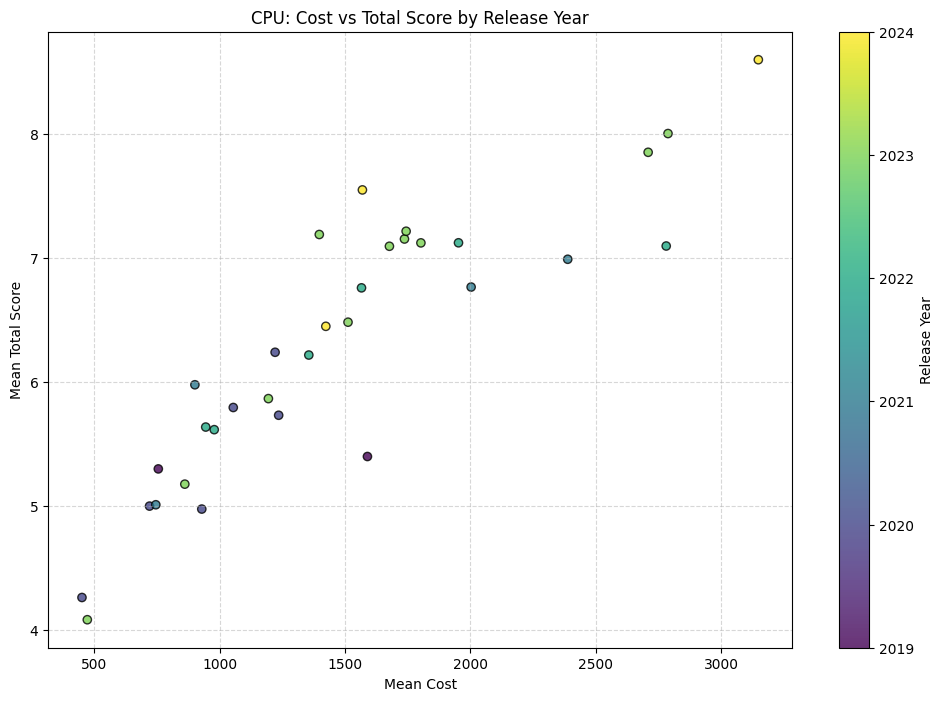

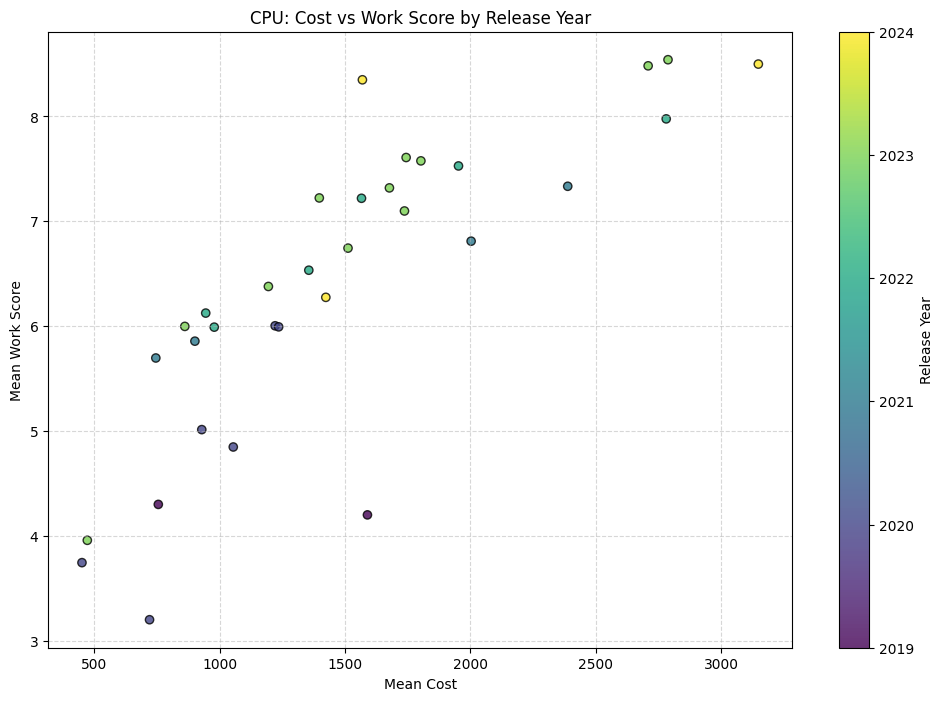

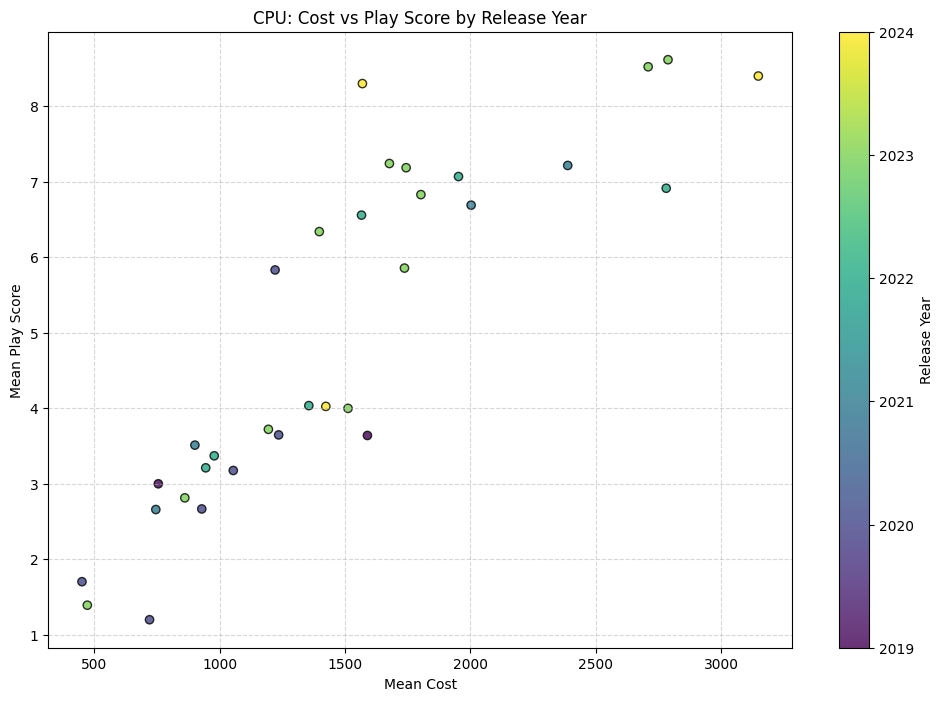

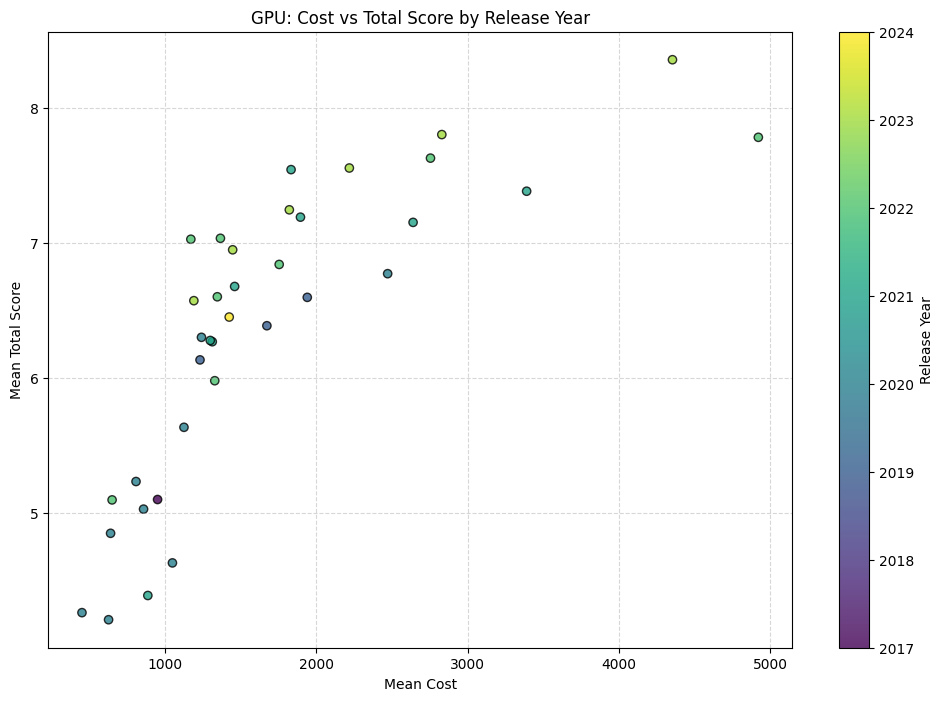

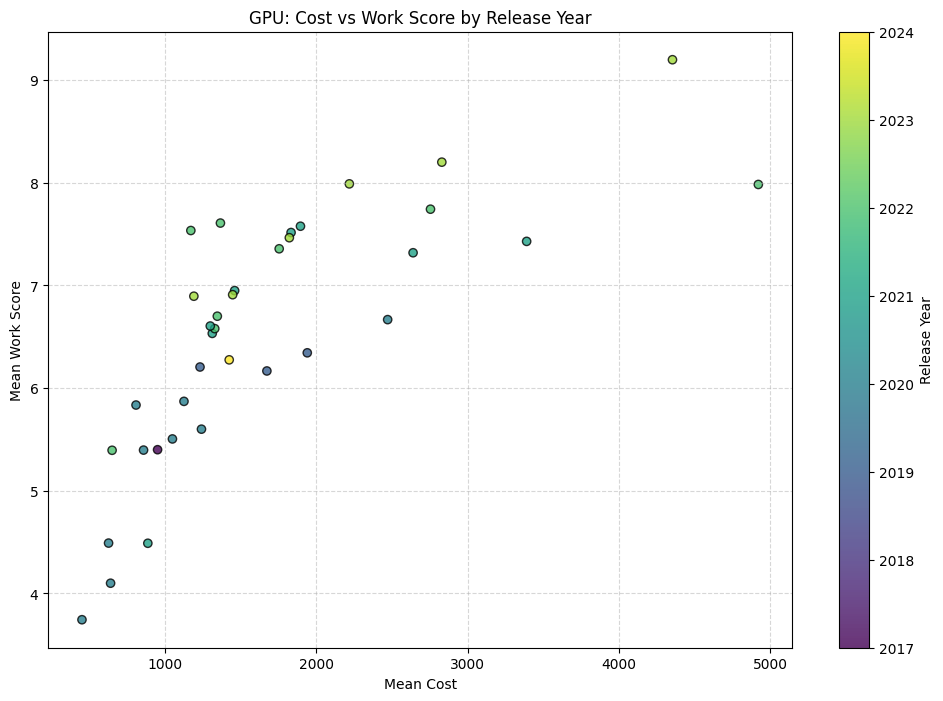

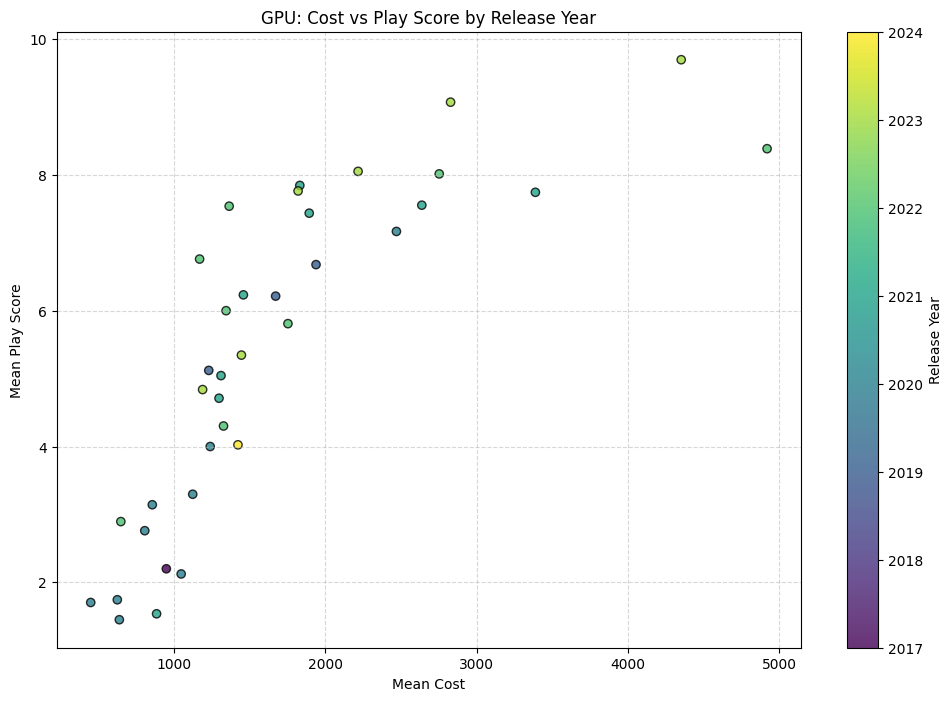

In [ ]:
# Load and clean the data
df = pd.read_csv("data/laptop_final.csv")
df = df[~df["Cost"].isna()]
df = df[~df["Total Score"].isna()]
df = df[df["Cost"]<=10000]
df = df[~df["GPU: Architecture"].isna()]
df = df[~df["CPU: Codename"].isna()]

# Function to process and plot data for CPU/GPU by a score type
def process_and_plot(df, group_column, release_column, score_column, title):
    # Extract the year part from the release quarter
    df["Release Year"] = df[release_column].apply(lambda x: int(str(x).split('.')[0]))
    
    # Group by the specified column
    grouped = df.groupby(group_column).agg(
        Release_Year_Mode=("Release Year", lambda x: x.mode()[0]),  # Mode of release year
        Mean_Cost=("Cost", "mean"),  # Mean cost
        Mean_Score=(score_column, "mean")  # Mean score for the selected type
    ).reset_index()

    # Plot scatter plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        grouped["Mean_Cost"],
        grouped["Mean_Score"],
        c=grouped["Release_Year_Mode"],  # Color by release year
        cmap="viridis",
        edgecolor="k",
        alpha=0.8
    )
    plt.colorbar(scatter, label="Release Year")
    plt.title(title)
    plt.xlabel("Mean Cost")
    plt.ylabel(f"Mean {score_column}")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# List of score types
score_types = ["Total Score", "Work Score", "Play Score"]

# Plot for CPU
for score in score_types:
    process_and_plot(
        df,
        "CPU: Codename",
        "CPU: Release quarter",
        score,
        f"CPU: Cost vs {score} by Release Year"
    )

# Plot for GPU
for score in score_types:
    process_and_plot(
        df,
        "GPU: Architecture",
        "GPU: Release quarter",
        score,
        f"GPU: Cost vs {score} by Release Year"
    )


# 3, Common Laptop

In [ ]:
# nah, useless

# 4, Trade-off Analysis Between Performance Score and Portability Score



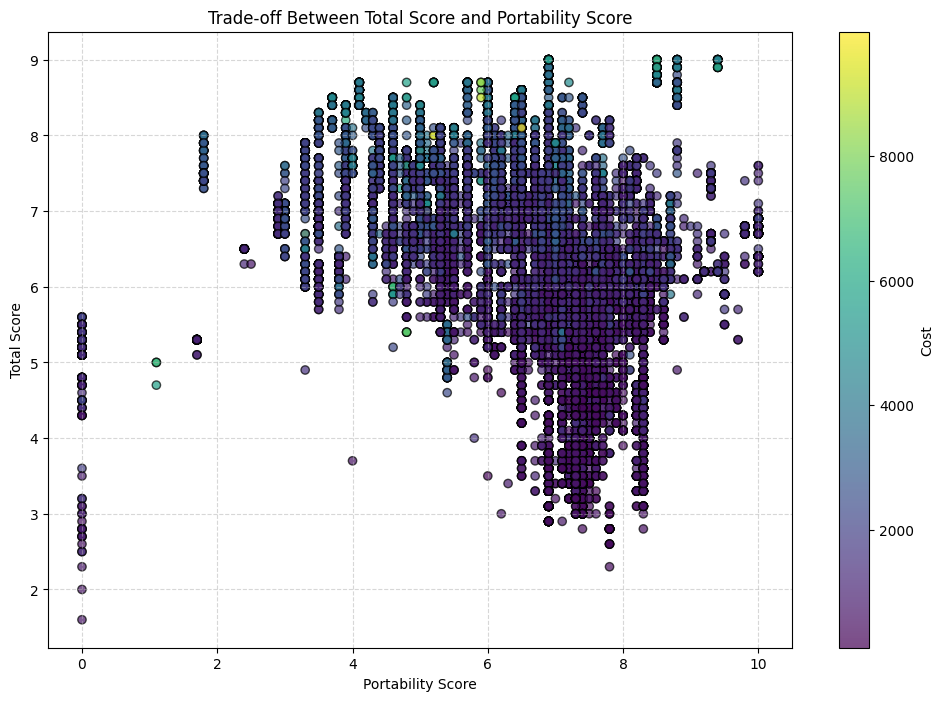

Correlation between Portability Score and Total Score: -0.46


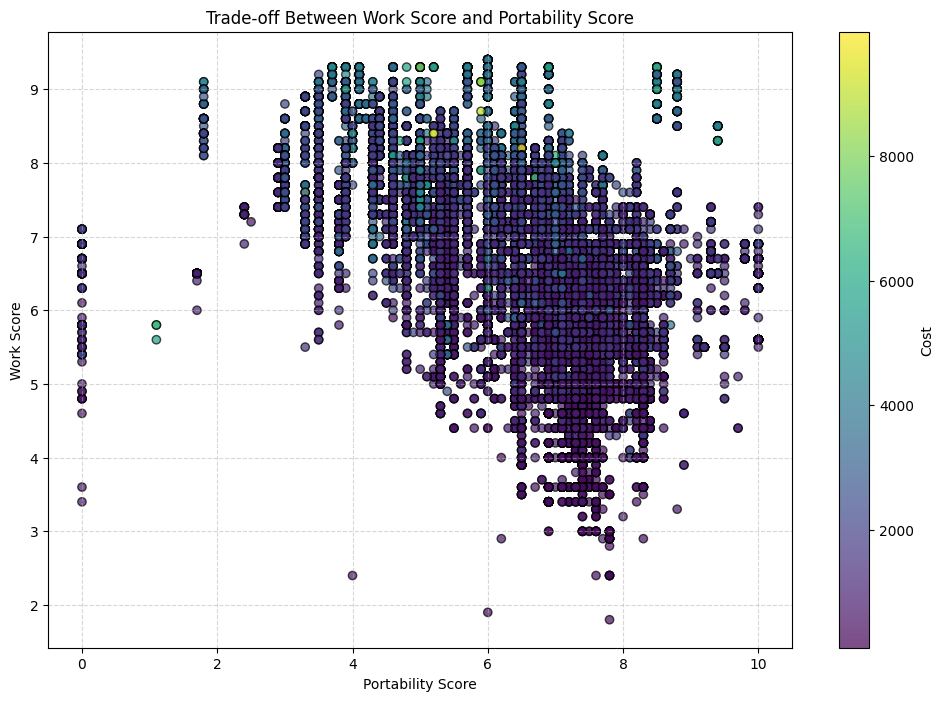

Correlation between Portability Score and Work Score: -0.54


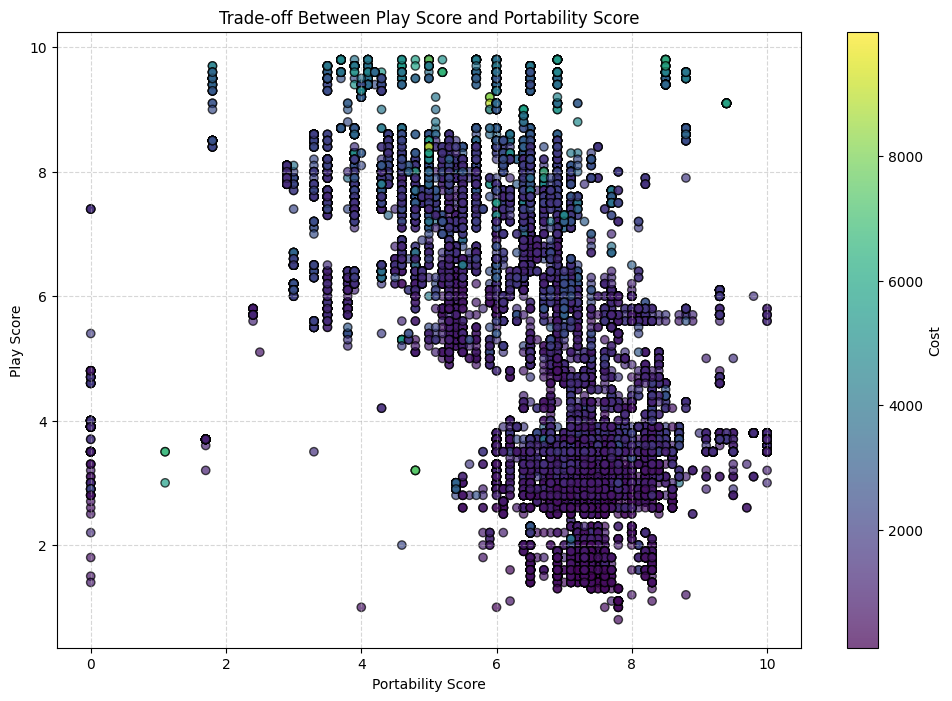

Correlation between Portability Score and Play Score: -0.65


In [60]:
df = pd.read_csv("data/laptop_final.csv")
df = df[~df["Cost"].isna()]
df = df[~df["Total Score"].isna()]
df = df[df["Cost"]<=10000]

def tradeoff_analysis(df, performance_score):
    plt.figure(figsize=(12, 8))
    
    # Scatter plot: Portability Score vs Performance Score
    scatter = plt.scatter(
        df["Portability Score"],
        df[performance_score],
        c=df["Cost"],  # Use cost as a color scale
        cmap="viridis",
        edgecolor="k",
        alpha=0.7
    )
    plt.colorbar(scatter, label="Cost")
    plt.title(f"Trade-off Between {performance_score} and Portability Score")
    plt.xlabel("Portability Score")
    plt.ylabel(performance_score)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

    # Correlation analysis
    correlation = df["Portability Score"].corr(df[performance_score])
    print(f"Correlation between Portability Score and {performance_score}: {correlation:.2f}")

# Perform trade-off analysis for Total Score, Work Score, and Play Score
for score in ["Total Score", "Work Score", "Play Score"]:
    tradeoff_analysis(df, score)

# 5, Certain brands dominate specific price or performance bins

<Figure size 1200x800 with 0 Axes>

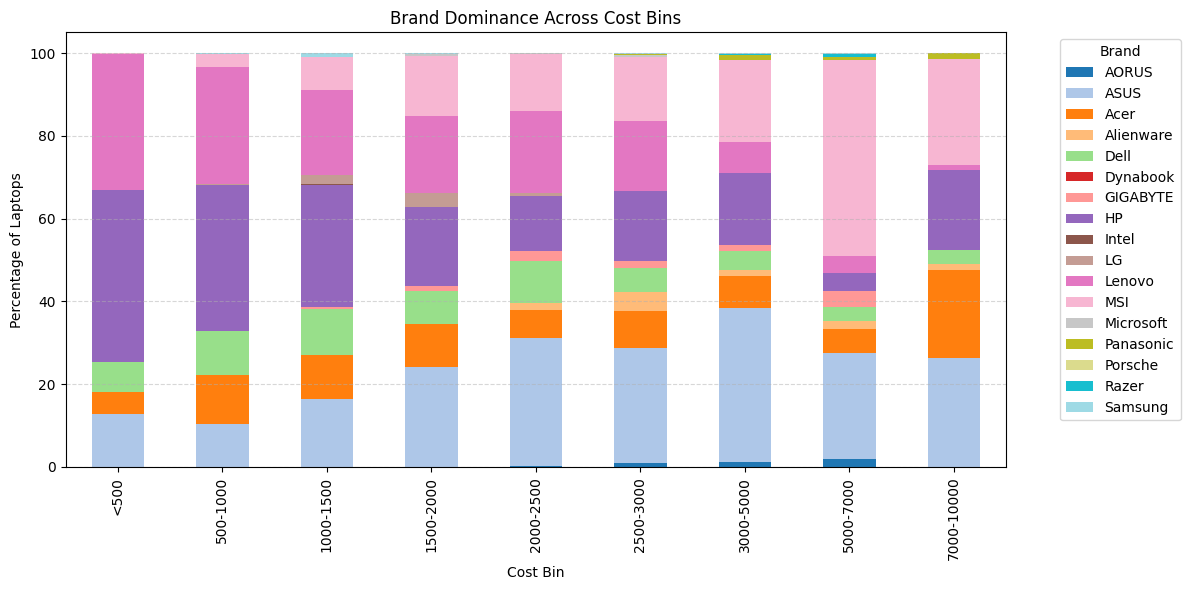

<Figure size 1200x800 with 0 Axes>

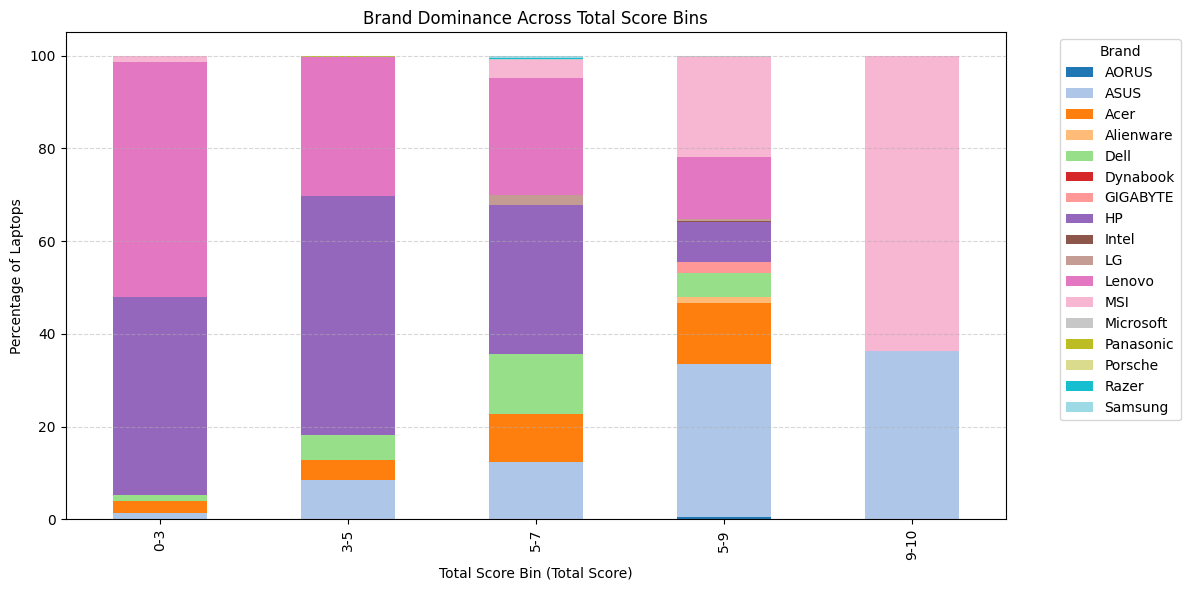

<Figure size 1200x800 with 0 Axes>

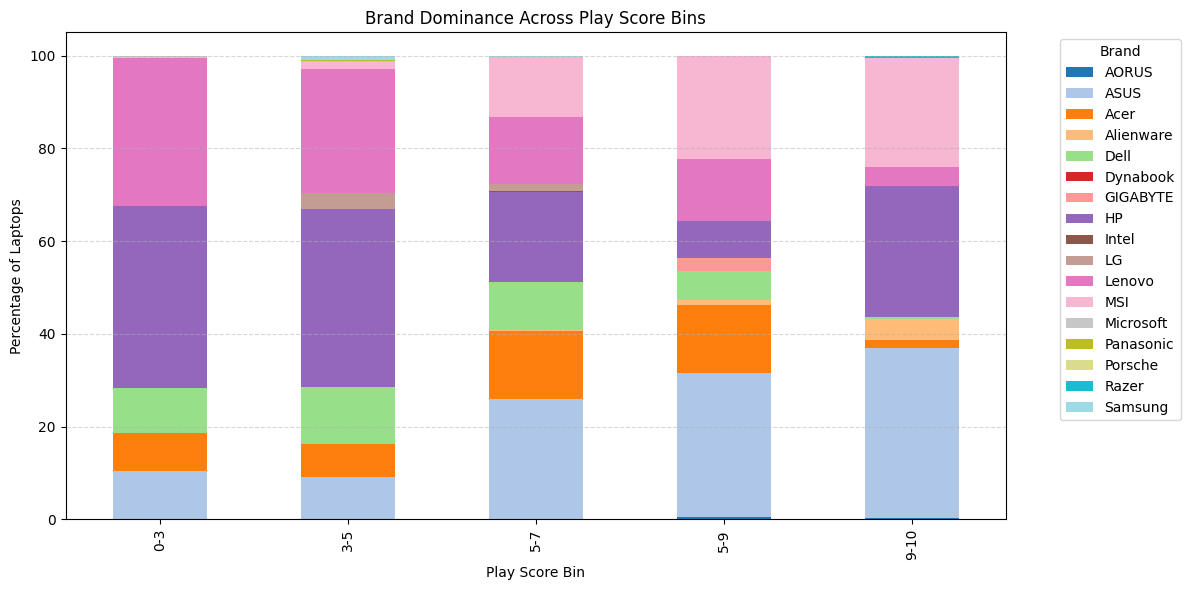

<Figure size 1200x800 with 0 Axes>

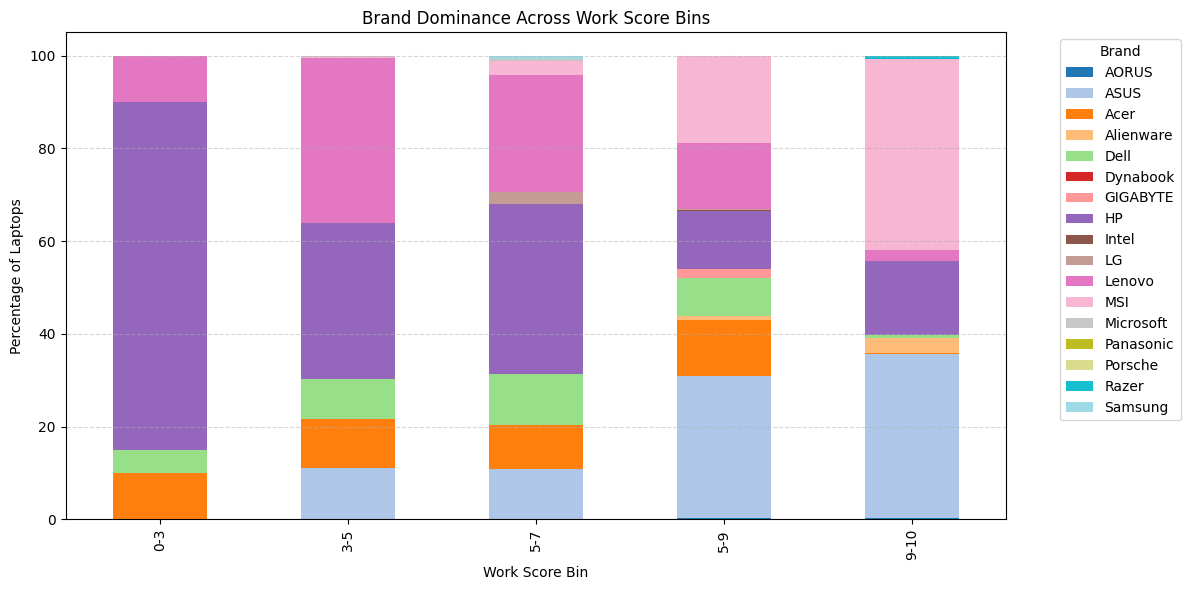

In [12]:
# Load and clean the data
df = pd.read_csv("data/laptop_final.csv")
df = df[~df["Cost"].isna()]
df = df[~df["Total Score"].isna()]

df["Brand"] = df["name"].apply(lambda a: a.split()[0])

# Define bins for cost and score
cost_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7000, 10000]  # Adjust based on dataset
score_bins = [0, 3, 5, 7, 9, 10]  # Adjust based on dataset
cost_labels = ["<500", "500-1000", "1000-1500", "1500-2000", "2000-2500", "2500-3000", "3000-5000", "5000-7000", "7000-10000"]
score_labels = ["0-3", "3-5", "5-7", "5-9", "9-10"]

# Bin the data
df["Cost Bin"] = pd.cut(df["Cost"], bins=cost_bins, labels=cost_labels, right=False)
df["Total Score Bin"] = pd.cut(df["Total Score"], bins=score_bins, labels=score_labels, right=False)
df["Play Score Bin"] = pd.cut(df["Play Score"], bins=score_bins, labels=score_labels, right=False)
df["Work Score Bin"] = pd.cut(df["Work Score"], bins=score_bins, labels=score_labels, right=False)


# Group by Brand and Bin
brand_cost_dist = df.groupby(["Brand", "Cost Bin"]).size().unstack(fill_value=0)
brand_score_dist = df.groupby(["Brand", "Total Score Bin"]).size().unstack(fill_value=0)
brand_play_score_dist = df.groupby(["Brand", "Play Score Bin"]).size().unstack(fill_value=0)
brand_work_score_dist = df.groupby(["Brand", "Work Score Bin"]).size().unstack(fill_value=0)

# Normalize within bins
brand_cost_dist_normalized = brand_cost_dist.div(brand_cost_dist.sum(axis=0), axis=1) * 100
brand_score_dist_normalized = brand_score_dist.div(brand_score_dist.sum(axis=0), axis=1) * 100
brand_play_score_dist_normalized = brand_play_score_dist.div(brand_play_score_dist.sum(axis=0), axis=1 ) * 100
brand_work_score_dist_normalized = brand_work_score_dist.div(brand_work_score_dist.sum(axis=0), axis=1) * 100

colormap = sns.color_palette("Set2", n_colors=len(brand_cost_dist_normalized.columns))

# Plot brand dominance by cost bin
plt.figure(figsize=(12, 8))
brand_cost_dist_normalized.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
plt.title("Brand Dominance Across Cost Bins")
plt.xlabel("Cost Bin")
plt.ylabel("Percentage of Laptops")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Plot brand dominance by Total Score Bin
plt.figure(figsize=(12, 8))
brand_score_dist_normalized.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
plt.title("Brand Dominance Across Total Score Bins")
plt.xlabel("Total Score Bin (Total Score)")
plt.ylabel("Percentage of Laptops")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Plot brand dominance by Play Score Bin
plt.figure(figsize=(12, 8))
brand_play_score_dist_normalized.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
plt.title("Brand Dominance Across Play Score Bins")
plt.xlabel("Play Score Bin")
plt.ylabel("Percentage of Laptops")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Plot brand dominance by Work Score
plt.figure(figsize=(12, 8))
brand_work_score_dist_normalized.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
plt.title("Brand Dominance Across Work Score Bins")
plt.xlabel("Work Score Bin")
plt.ylabel("Percentage of Laptops")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()